## 1. Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore warning messages
import warnings
warnings.filterwarnings("ignore")

## 2. Import dataset    
Link: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)   
Attribute Information:

1) ID number    
2) Diagnosis (M = malignant, B = benign)     

Ten real-valued features are computed for each cell nucleus:     
a) radius (mean of distances from center to points on the perimeter)    
b) texture (standard deviation of gray-scale values)     
c) perimeter    
d) area     
e) smoothness (local variation in radius lengths)     
f) compactness (perimeter^2 / area - 1.0)     
g) concavity (severity of concave portions of the contour)     
h) concave points (number of concave portions of the contour)      
i) symmetry     
j) fractal dimension ("coastline approximation" - 1)    

In [2]:
path = '/Users/mangueira/Library/Mobile Documents/com~apple~CloudDocs/devNilton/projetoFinal_IA4/cancerDiagnosticProject/datasetDiagnostic.csv'
dataExams_v0 = pd.read_csv (path, sep=',', encoding='utf-8')
dataExams_v0.head()

,Id,Diagnostic,Exam_1,Exam_2,Exam_3,Exam_4,Exam_5,Exam_6,Exam_7,Exam_8,...,Exam_24,Exam_25,Exam_26,Exam_27,Exam_28,Exam_29,Exam_30,Exam_31,Exam_32,Exam_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


## 3. Data processing 1

### 3.1. Show columns with null instances 

In [3]:
# Null instances (> 90%):
dataExams_v0.isnull().sum()

Id              0
Diagnostic      0
Exam_1          0
Exam_2          0
Exam_3          0
Exam_4          0
Exam_5          0
Exam_6          0
Exam_7          0
Exam_8          0
Exam_9          0
Exam_10         0
Exam_11         0
Exam_12         0
Exam_13         0
Exam_14         0
Exam_15         0
Exam_16         0
Exam_17         0
Exam_18         0
Exam_19         0
Exam_20         0
Exam_21         0
Exam_22         0
Exam_23         0
Exam_24         0
Exam_25         0
Exam_26         0
Exam_27         0
Exam_28         0
Exam_29         0
Exam_30         0
Exam_31         0
Exam_32         0
Exam_33       419
dtype: int64

### 3.2. Remove columns with null instances 

In [4]:
# dataExams_v1 (remove):
    # "Exam_33" column (more than 90% NaN)
    # "Id" (non-numeric data);
    # "Diagnostic" (dataset outputs examples)

dataExams_v1 = dataExams_v0.drop(columns=['Id', 'Diagnostic', 'Exam_33'])

dataExams_v1.head()

,Exam_1,Exam_2,Exam_3,Exam_4,Exam_5,Exam_6,Exam_7,Exam_8,Exam_9,Exam_10,...,Exam_23,Exam_24,Exam_25,Exam_26,Exam_27,Exam_28,Exam_29,Exam_30,Exam_31,Exam_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


### 3.3. Expected output (label) 

In [5]:
diagnostic = dataExams_v0.Diagnostic

diagnostic.head()

0    M
1    M
2    M
3    M
4    M
Name: Diagnostic, dtype: object

## 4. Creating a classification model

### 4.1 Using train_test_split:      
Split arrays or matrices into random train and test subsets.    
Link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

training_x, test_x, training_y, test_y = train_test_split(dataExams_v1, 
                                                          diagnostic,
                                                          test_size = 0.3)

# training_x and test_x = dataExams_v1
# training_y and test_y = diagnostic (exemples)

#### 4.1.1. Show test and training dataset 

In [7]:
print("Training data (70%):", training_x.shape, training_y.shape, "\n"
          "Test data (30%):", test_x.shape, test_y.shape)

Training data (70%): (398, 32) (398,) 
Test data (30%): (171, 32) (171,)


### 4.2 Using RandomForestClassifier method:      
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples the dataset and uses averaging to improve the predictive accuracy and control over-fitting.    
Link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [8]:
# RandomForestClassifier_v1 (using dataExams_v1)

from sklearn.ensemble import RandomForestClassifier

def classifyRandom_v1 (values):
    
    classifier = RandomForestClassifier(n_estimators = 100)
    
    classifier.fit(training_x, training_y)

    print("RandomForestClassifier_v1 (baseline1) = %.2f%%" %(classifier.score(test_x,test_y)*100))

#### 4.2.1. Show result RandomForestClassifier_v1 

In [9]:
classifyRandom_v1(dataExams_v1)

RandomForestClassifier_v1 (baseline1) = 92.40%


### 4.3 Using DummyClassifier method (simple classification):       
This classifier serves as a simple baseline to compare against other more complex classifiers.     
Link: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [10]:
# Classification DummyClassifier_v1 (using dataExams_v1)

from sklearn.dummy import DummyClassifier

def classifyDummy (values):

    classifier = DummyClassifier(strategy= "most_frequent")
    
    classifier.fit(training_x, training_y)
    
    print("DummyClassifier_v1 (baseline2) = %.2f%%" %(classifier.score(test_x,test_y)*100))

#### 4.2.1. Show result DummyClassifier_v1  

In [11]:
classifyDummy(dataExams_v1)

DummyClassifier_v1 (baseline2) = 66.67%


### - Comparing the Methods applied (1):

In [12]:
classifyRandom_v1(dataExams_v1)
classifyDummy(dataExams_v1)

RandomForestClassifier_v1 (baseline1) = 92.40%
DummyClassifier_v1 (baseline2) = 66.67%


## 5. Graphic analysis for model fits       
Best for graphics visualization

### 5.1 Using pandas.melt function  
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.   
Link: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [13]:
# data_plot = Diagnostic + dataExams_v1

data_plot = pd.concat([diagnostic, dataExams_v1],axis = 1)
#data_plot.head()

data_plot = pd.melt(data_plot, 
                     id_vars="Diagnostic",
                     var_name="Exams",
                     value_name='values')
#data_plot.head(569)

### 5.2. Using StandardScaler function (standardize)   
Standardize features by removing the mean and scaling to unit variance.   
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [14]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

standard.fit(dataExams_v1)

dataExams_v2 = standard.transform(dataExams_v1)

dataExams_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### 5.3. Using seaborn.violinplot function   
Draw a combination of boxplot and kernel density estimate.    
https://seaborn.pydata.org/generated/seaborn.violinplot.html

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


data_plot = pd.concat([diagnostic, dataExams_v1.iloc[:,0:10]],axis = 1)

data_plot = pd.melt(data_plot,
                    id_vars="Diagnostic",
                    var_name="Exams",
                    value_name='values')

#plt.figure(figsize=(10, 10))
#sns.violinplot(x = "Exams", y = "values", hue = "Diagnostic",
#               data = data_plot)
#plt.xticks(rotation = 90)

In [22]:
standard = StandardScaler()

standard.fit(dataExams_v1)

dataExams_v2 = standard.transform(dataExams_v1)

dataExams_v2 = pd.DataFrame(data = dataExams_v2,
                              columns = dataExams_v1.keys())

data_plot = pd.concat([diagnostic, dataExams_v2.iloc[:,0:10]],axis = 1)

data_plot = pd.melt(data_plot,
                    id_vars="Diagnostic",
                    var_name="Exams",
                    value_name='values')

#plt.figure(figsize=(10, 10))

#sns.violinplot(x = "Exams", y = "values", hue = "Diagnostic",
#               data = data_plot, split= True)

#plt.xticks(rotation = 90)

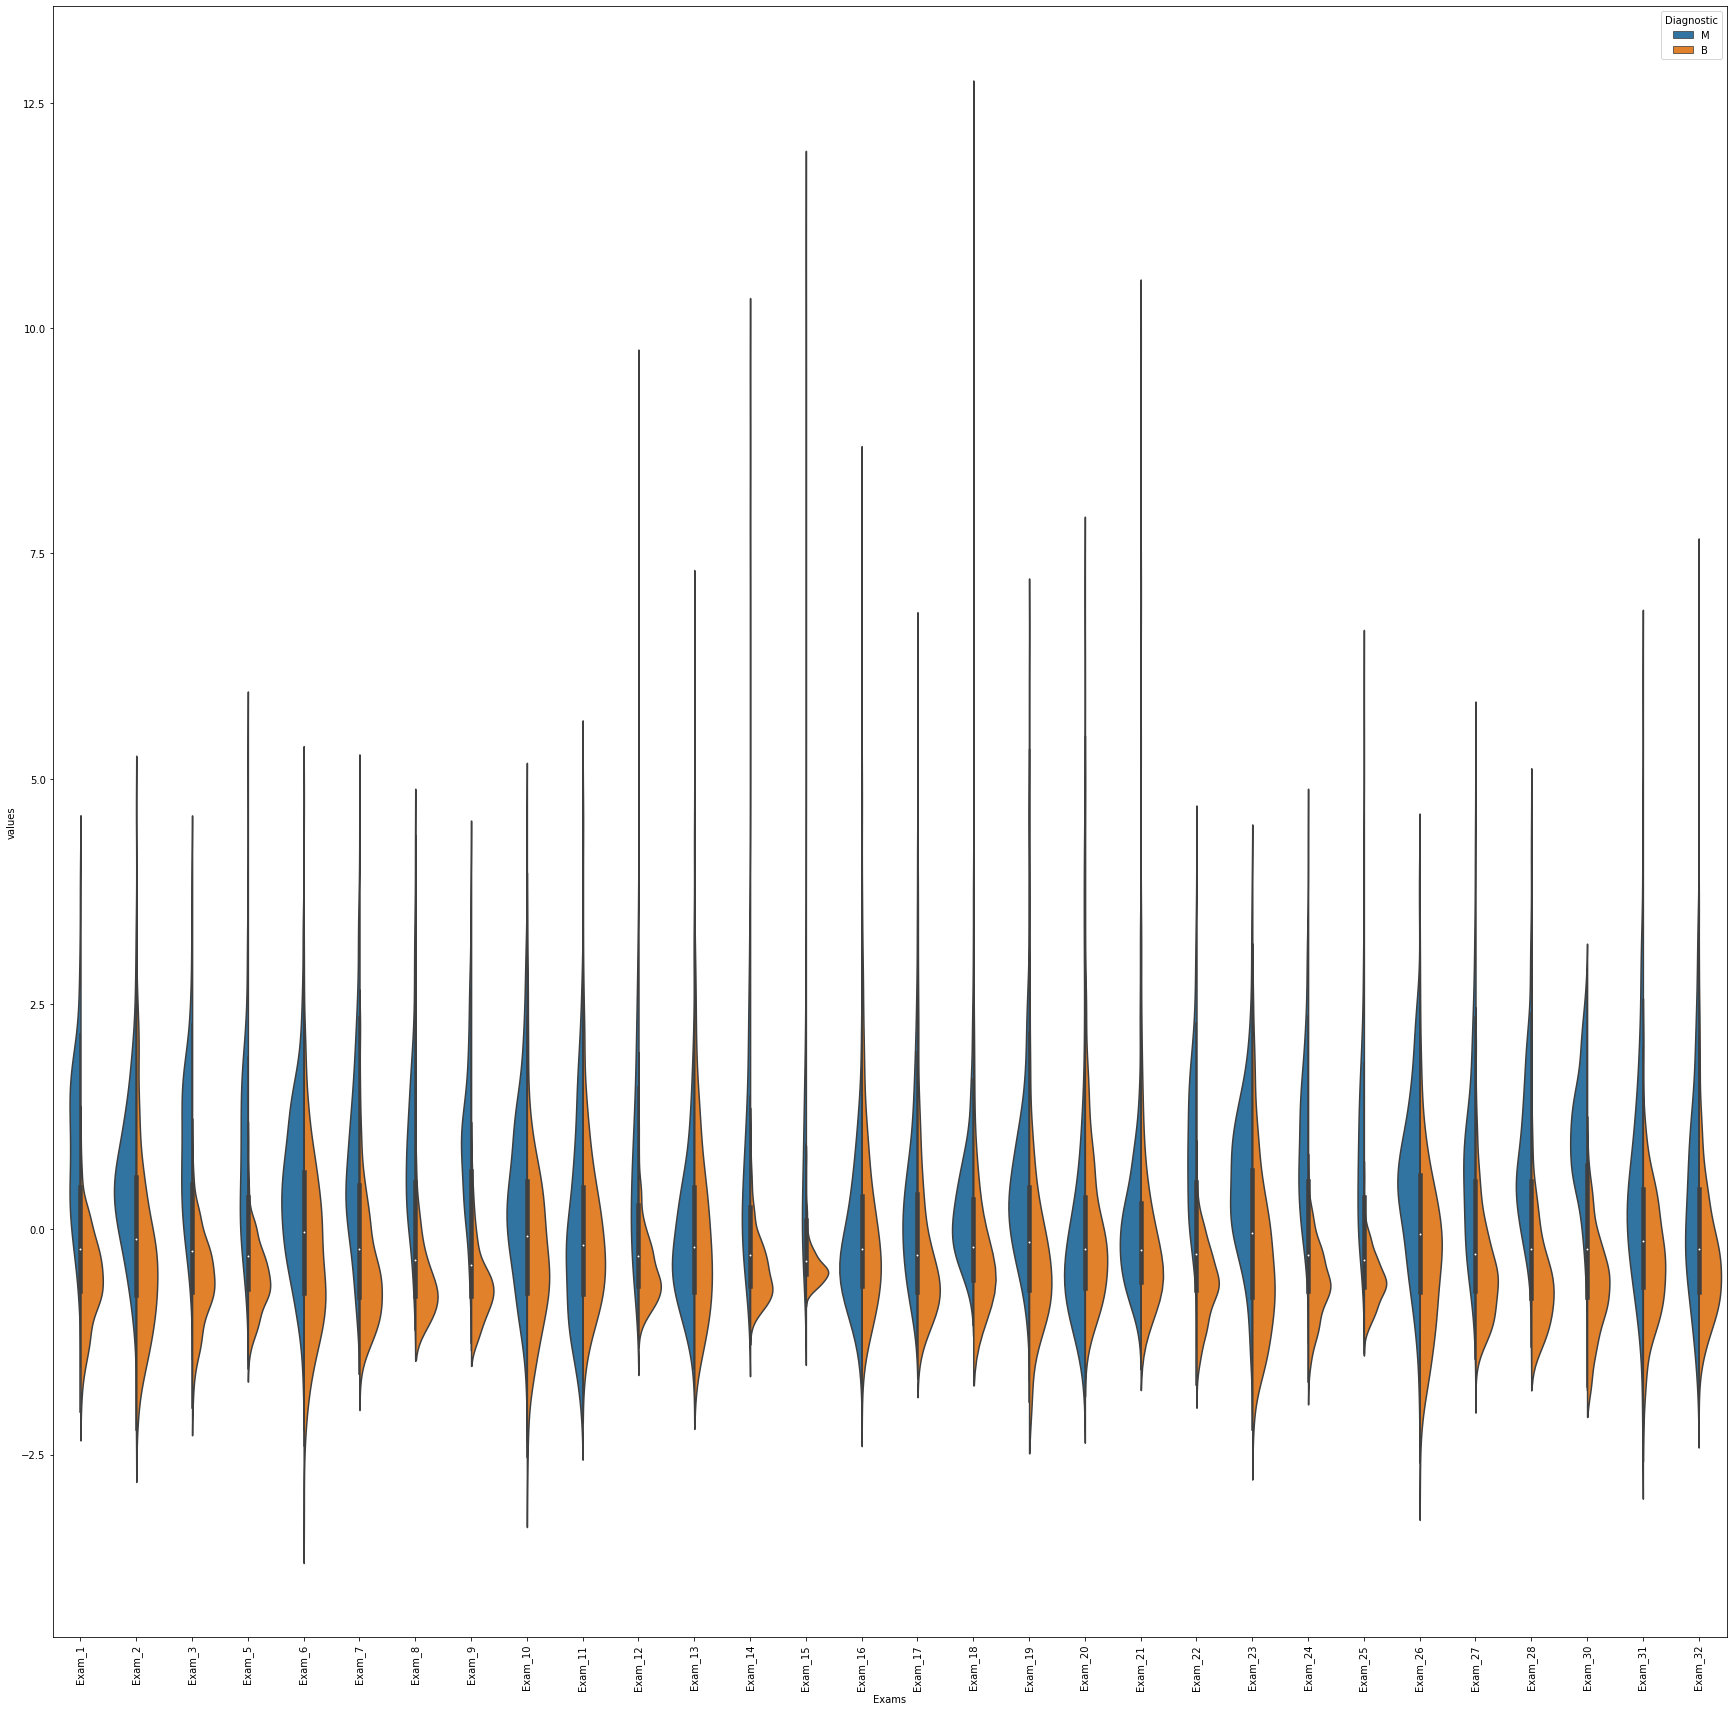

In [29]:
# Remove Constant values in this data (line): Exam_3 e Exam_29   

dataExams_v3 = dataExams_v2.drop(columns=["Exam_29", "Exam_4"])
#dataExams_v3.head()


# ViolinPlot adjusted

def violinPlot(values, inicio, fim):
    
    data_plot = pd.concat([diagnostic, values.iloc[:,inicio:fim]],axis = 1)
    
    data_plot = pd.melt(data_plot,
                        id_vars="Diagnostic",
                        var_name="Exams",
                        value_name='values')
    
    plt.figure(figsize=(30, 30))
    
    sns.violinplot(x = "Exams", y = "values", hue = "Diagnostic",
                   data = data_plot, split= True)
    
    plt.xticks(rotation = 90)

violinPlot(dataExams_v3, 0, 32)

## 6. RandomForestClassifier_v2 (after graphic adjustment)  

In [31]:
# RandomForestClassifier_v2  (using dataExams_v3)

def classifyRandom_v2 (values):
    SEED = 1234
    random.seed(SEED)
   
    training_x, test_x, training_y, test_y = train_test_split(values, 
                                                        diagnostic,
                                                        test_size = 0.3)

    classifier = RandomForestClassifier(n_estimators = 100)
    
    classifier.fit(training_x, training_y)
    
    print("RandomForestClassifier_v2 = %.2f%%" %(classifier.score(test_x,test_y)*100))

### 6.1. Show result RandomForestClassifier_v2

In [32]:
classifyRandom_v2(dataExams_v3)

RandomForestClassifier_v2 = 92.98%


### - Comparing the Methods applied (2):

In [33]:
classifyRandom_v1(dataExams_v1)
classifyDummy(dataExams_v1)
classifyRandom_v2(dataExams_v3)

RandomForestClassifier_v1 (baseline1) = 92.40%
DummyClassifier_v1 (baseline2) = 66.67%
RandomForestClassifier_v2 = 92.98%


# Daniel (a partir do item 7)

### 7. Matrix correlation

### 7.1. Using heat map    
Plot rectangular data as a color-encoded matrix.   
Link: https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot: >

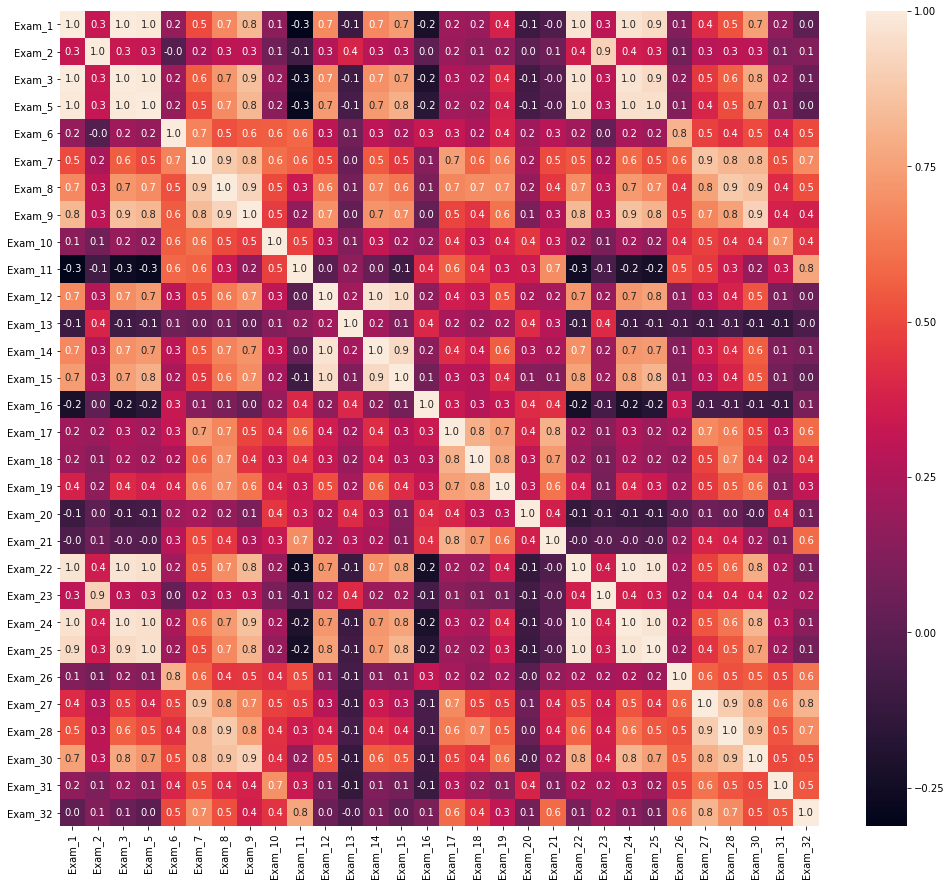

In [35]:
# matrixCorrelation (using dataExams_v3)

matrixCorrelation = dataExams_v3.corr()

plt.figure(figsize = (17, 15))

# mapa de calor
sns.heatmap(matrixCorrelation, annot = True, fmt = ".1f")

#### 7.1.1. Ajustando os dados da matrix de correlação 

In [42]:
# Identificar variáveis com correlação > 0.99

matrixCorrelation_v1 = matrixCorrelation[matrixCorrelation > 0.99].sum()

matrixCorrelation_v1

Exam_1     1.997855
Exam_2     1.000000
Exam_3     1.997855
Exam_5     1.000000
Exam_6     1.000000
Exam_7     1.000000
Exam_8     1.000000
Exam_9     1.000000
Exam_10    1.000000
Exam_11    1.000000
Exam_12    1.000000
Exam_13    1.000000
Exam_14    1.000000
Exam_15    1.000000
Exam_16    1.000000
Exam_17    1.000000
Exam_18    1.000000
Exam_19    1.000000
Exam_20    1.000000
Exam_21    1.000000
Exam_22    1.993708
Exam_23    1.000000
Exam_24    1.993708
Exam_25    1.000000
Exam_26    1.000000
Exam_27    1.000000
Exam_28    1.000000
Exam_30    1.000000
Exam_31    1.000000
Exam_32    1.000000
dtype: float64

In [43]:
# Criando variável para receber os valores de correlação > 1.0:

correlatedVeriables = matrixCorrelation_v2[matrixCorrelation_v2>1]

correlatedVeriables

Exam_1     1.997855
Exam_3     1.997855
Exam_22    1.993708
Exam_24    1.993708
dtype: float64

In [44]:
# Drop variables correlated
dataExams_v4 = dataExams_v3.drop(columns=correlatedVeriables.keys())

dataExams_v4

,Exam_2,Exam_5,Exam_6,Exam_7,Exam_8,Exam_9,Exam_10,Exam_11,Exam_12,Exam_13,...,Exam_20,Exam_21,Exam_23,Exam_25,Exam_26,Exam_27,Exam_28,Exam_30,Exam_31,Exam_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## 8. RandomForestClassifier_v3 (after matrixCorrelation adjustment) 

In [45]:
# Classification RandomForestClassifier_v3  (using dataExams_v4)

def classifyRandom_v3 (values):
    SEED = 1234
    random.seed(SEED)
   
    training_x, test_x, training_y, test_y = train_test_split(values, 
                                                        diagnostic,
                                                        test_size = 0.3)

    classifier = RandomForestClassifier(n_estimators = 100)
    
    classifier.fit(training_x, training_y)
    
    print("RandomForestClassifier_v3 = %.2f%%" %(classifier.score(test_x,test_y)*100))

RandomForestClassifier_v3 = 91.81%


### 8.1. Show result RandomForestClassifier_v3 (after matrixCorrelation adjustment)

In [46]:
classifyRandom_v3(dataExams_v4)

RandomForestClassifier_v3 = 91.81%


### - Comparing the Methods applied (3):

In [47]:
classifyRandom_v1(dataExams_v1)
classifyDummy(dataExams_v1)
classifyRandom_v2(dataExams_v3)
classifyRandom_v3(dataExams_v4)

RandomForestClassifier_v1 (baseline1) = 92.40%
DummyClassifier_v1 (baseline2) = 66.67%
RandomForestClassifier_v2 = 92.98%
RandomForestClassifier_v3 = 91.81%


### 8.2. Show result RandomForestClassifier_v4 (after matrixCorrelation adjustment)

In [50]:
# Identificamos que as variáveis Exam_1 e Exam_22 não deveriam ser removidas,
#                                            assim vamos excluir apenas Exam_3 e 24:

dataExams_v5 = dataExams_v3.drop(columns=["Exam_3", "Exam_24"])

# Classification RandomForestClassifier_v4  (using dataExams_v5)

def classifyRandom_v4 (values):
    SEED = 1234
    random.seed(SEED)
   
    training_x, test_x, training_y, test_y = train_test_split(values, 
                                                        diagnostic,
                                                        test_size = 0.3)

    classifier = RandomForestClassifier(n_estimators = 100)
    
    classifier.fit(training_x, training_y)
    
    print("RandomForestClassifier_v4 = %.2f%%" %(classifier.score(test_x,test_y)*100))

### 8.2.1. Show result RandomForestClassifier_v4 (after matrixCorrelation adjustment)

In [49]:
classifyRandom_v4(dataExams_v5)

RandomForestClassifier_v4 = 92.98%


### - Compare the Methods applied (4):

In [51]:
classifyRandom_v1(dataExams_v1)
classifyDummy(dataExams_v1)
classifyRandom_v2(dataExams_v3)
classifyRandom_v3(dataExams_v4)
classifyRandom_v4(dataExams_v5)

RandomForestClassifier_v1 (baseline1) = 92.40%
DummyClassifier_v1 (baseline2) = 66.67%
RandomForestClassifier_v2 = 92.98%
RandomForestClassifier_v3 = 91.81%
RandomForestClassifier_v4 = 92.98%


## 9. Using SelectKBest   
Select features according to the k highest scores.   
Link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [52]:
# Criar dataExams_v7 sem valores negativos e sem as features excluídas 3, 4, 24 e 29

dataExams_v6 = dataExams_v1.drop(columns=(["Exam_4", "Exam_29", "Exam_3", "Exam_24"]))

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_KBest = SelectKBest(chi2, k = 5)

In [54]:
SEED= 1234
random.seed(SEED)

training_x, test_x, training_y, test_y = train_test_split(dataExams_v6, 
                                                        diagnostic,
                                                        test_size = 0.3)


select_KBest.fit(training_x,training_y)
training_kbest = select_KBest.transform(training_x)
test_kbest = select_KBest.transform(test_x)

In [55]:
# Total de features(colunas) usadas no test
test_kbest.shape

(171, 5)

### 9.1. RandomForestClassifier_v5  (using dataExams_v6 and SelectKBest) 

In [57]:
# RandomForestClassifier_v5  (using dataExams_v6 and SelectKBest)

def classifyRandom_v5 (values):
    SEED = 1234
    random.seed(SEED)

    training_x, test_x, training_y, test_y = train_test_split(values, 
                                                        diagnostic,
                                                        test_size = 0.3)

    select_KBest.fit(training_x,training_y)
    training_kbest = select_KBest.transform(training_x)
    test_kbest = select_KBest.transform(test_x)
    
    classifier = RandomForestClassifier(n_estimators = 100, random_state=1234)
    
    classifier.fit(training_kbest, training_y)
    
    print("RandomForestClassifier_v5 (selectKBest) = %.2f%%" %(classifier.score(test_kbest,test_y)*100))

#### 9.1.1. Show result RandomForestClassifier_v5 (SelectKBest)

In [58]:
classifyRandom_v5(dataExams_v6)

RandomForestClassifier_v5 (selectKBest) = 92.40%


### - Compare the Methods applied (5):

In [59]:
classifyRandom_v1(dataExams_v1)
classifyDummy(dataExams_v1)
classifyRandom_v2(dataExams_v3)
classifyRandom_v3(dataExams_v4)
classifyRandom_v4(dataExams_v5)
classifyRandom_v5(dataExams_v6)

RandomForestClassifier_v1 (baseline1) = 92.98%
DummyClassifier_v1 (baseline2) = 61.40%
RandomForestClassifier_v2 = 92.98%
RandomForestClassifier_v3 = 91.81%
RandomForestClassifier_v4 = 92.98%
RandomForestClassifier_v5 (selectKBest) = 92.40%


## 10. Confusion matrix
Compute confusion matrix to evaluate the accuracy of a classification.    
Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [60]:
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 100, random_state=1234)
classifier.fit(training_kbest, training_y)

matrixConfusion = confusion_matrix(test_y,classifier.predict(test_kbest))

[Text(0.5, 16.5, 'Prediction'), Text(34.5, 0.5, 'Real')]

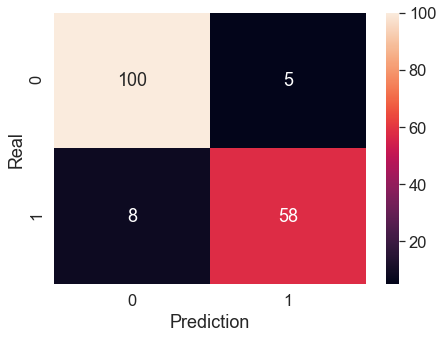

In [61]:
plt.figure(figsize = (7, 5))
sns.set(font_scale= 1.5)
sns.heatmap(matrixConfusion, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel= "Real")

# Cayo (a partir do item 11)

## 11. RFE (Recursive Feature Elimination)   
Feature ranking with recursive feature elimination.   
Link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [63]:
# Classification RandomForestClassifier_v6  (using dataExams_v6 and RFE)

from sklearn.feature_selection import RFE

def classifyRandom_v6 (values):
    SEED = 1234
    random.seed(SEED)

    training_x, test_x, training_y, test_y = train_test_split(values, 
                                                        diagnostic,
                                                        test_size = 0.3)

    classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
    classifier.fit(training_x, training_y)
    select_rfe = RFE(estimator = classifier, n_features_to_select = 5, step = 1)
    select_rfe.fit(training_x, training_y)
    training_rfe = select_rfe.transform(training_x)
    test_rfe = select_rfe.transform(test_x)
    classifier.fit(training_rfe, training_y)

    matrixConfusion = confusion_matrix(test_y,classifier.predict(test_rfe))
    plt.figure(figsize = (7, 5))
    sns.set(font_scale= 1.5)
    sns.heatmap(matrixConfusion, annot = True, fmt = "d").set(xlabel = "Prediction_1", ylabel= "Real_1")
    
    print("RandomForestClassifier_v6 (RFE and confusioMatrix) = %.2f%%" %(classifier.score(test_rfe,test_y)*100))

### 11.1 Show result RandomForestClassifier_v6  (using dataExams_v6 and RFE)

RandomForestClassifier_v6 (RFE and confusioMatrix) = 90.06%


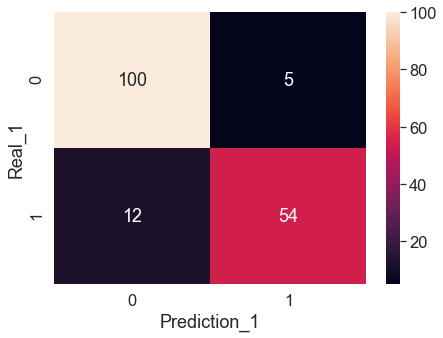

In [64]:
classifyRandom_v6(dataExams_v6)

### - Compare the Methods applied (6):

RandomForestClassifier_v1 (baseline1) = 92.98%
DummyClassifier_v1 (baseline2) = 61.40%
RandomForestClassifier_v2 = 92.98%
RandomForestClassifier_v3 = 91.81%
RandomForestClassifier_v4 = 92.98%
RandomForestClassifier_v5 (selectKBest) = 92.40%
RandomForestClassifier_v6 (RFE and confusioMatrix) = 90.06%


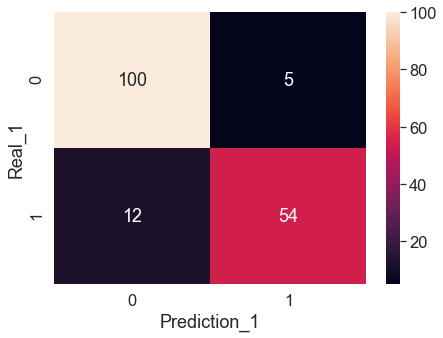

In [65]:
classifyRandom_v1(dataExams_v1)
classifyDummy(dataExams_v1)
classifyRandom_v2(dataExams_v3)
classifyRandom_v3(dataExams_v4)
classifyRandom_v4(dataExams_v5)
classifyRandom_v5(dataExams_v6)
classifyRandom_v6(dataExams_v5)

##  12. RFECV (Recursive Feature Elimination Cross-Validation)    
Recursive feature elimination with cross-validation to select features.   
Link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [70]:
# Classification RandomForestClassifier_v7  (using dataExams_v5 and RFECV)

from sklearn.feature_selection import RFECV

def classifyRandom_v7 (values):
    SEED = 1234
    random.seed(SEED)

    training_x, test_x, training_y, test_y = train_test_split(values, 
                                                        diagnostic,
                                                        test_size = 0.3)

    classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
    classifier.fit(training_x, training_y)
    select_rfecv = RFECV(estimator = classifier, cv = 5, step = 1, scoring="accuracy")
    select_rfecv.fit(training_x, training_y)
    training_rfecv = select_rfecv.transform(training_x)
    test_rfecv = select_rfecv.transform(test_x)
    classifier.fit(training_rfecv, training_y)

    matrixConfusion = confusion_matrix(test_y,classifier.predict(test_rfecv))

    plt.figure(figsize = (7, 5))
    sns.set(font_scale= 1.5)
    sns.heatmap(matrixConfusion, annot = True, fmt = "d").set(xlabel = "Prediction_2", ylabel= "Real_2")
    
    print("RandomForestClassifier_v7 (RFE_CV and confusioMatrix) = %.2f%%" %(classifier.score(test_rfecv,test_y)*100))

### 12.1 Show result RandomForestClassifier_v7 (RFE_CV and confusioMatrix))

RandomForestClassifier_v7 (RFE_CV and confusioMatrix) = 92.98%


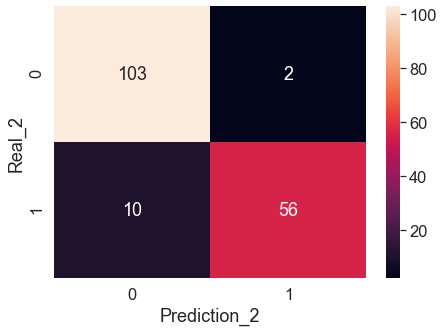

In [71]:
classifyRandom_v7(dataExams_v6)

### - Compare the Methods applied (7):

RandomForestClassifier_v1 (baseline1) = 92.98%
DummyClassifier_v1 (baseline2) = 61.40%
RandomForestClassifier_v2 = 92.98%
RandomForestClassifier_v3 = 91.81%
RandomForestClassifier_v4 = 92.98%
RandomForestClassifier_v5 (selectKBest) = 92.40%
RandomForestClassifier_v6 (RFE and confusioMatrix) = 90.06%
RandomForestClassifier_v7 (RFE_CV and confusioMatrix) = 92.98%


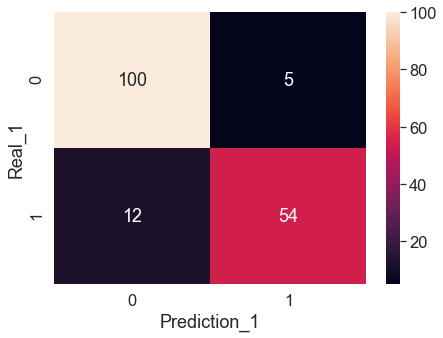

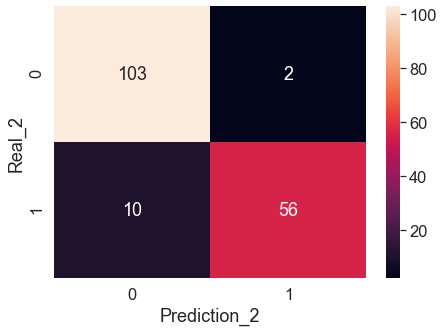

In [72]:
classifyRandom_v1(dataExams_v1)
classifyDummy(dataExams_v1)
classifyRandom_v2(dataExams_v3)
classifyRandom_v3(dataExams_v4)
classifyRandom_v4(dataExams_v5)
classifyRandom_v5(dataExams_v6)
classifyRandom_v6(dataExams_v5)
classifyRandom_v7(dataExams_v5)

### 12.2 Accuracy

In [73]:
select_rfecv = RFECV(estimator = classifier, cv = 5, step = 1, scoring="accuracy")
select_rfecv.fit(training_x, training_y)

# Identify the best features
training_x.columns[select_rfecv.support_]

Index(['Exam_1', 'Exam_2', 'Exam_5', 'Exam_6', 'Exam_7', 'Exam_8', 'Exam_9',
       'Exam_10', 'Exam_12', 'Exam_13', 'Exam_14', 'Exam_15', 'Exam_16',
       'Exam_18', 'Exam_19', 'Exam_20', 'Exam_21', 'Exam_22', 'Exam_23',
       'Exam_25', 'Exam_26', 'Exam_27', 'Exam_28', 'Exam_30', 'Exam_31',
       'Exam_32'],
      dtype='object')

In [74]:
len(select_rfecv.grid_scores_)

28

In [75]:
select_rfecv.grid_scores_

array([[0.85      , 0.8875    , 0.8625    , 0.89873418, 0.84810127],
       [0.9375    , 0.9375    , 0.9625    , 0.93670886, 0.88607595],
       [0.925     , 0.95      , 0.95      , 0.97468354, 0.93670886],
       [0.9125    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.9375    , 0.9625    , 0.98734177, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.97468354, 0.93670886],
       [0.925     , 0.975     , 0.975     , 0.98734177, 0.94936709],
       [0.9125    , 0.9625    , 0.95      , 0.97468354, 0.93670886],
       [0.925     , 0.9625    , 0.975     , 0.96202532, 0.93670886],
       [0.9375    , 0.975     , 0.9625    , 0.98734177, 0.93670886],
       [0.95      , 0.9625    , 0.9625    , 0.98734177, 0.94936709],
       [0.9625    , 0.95      , 0.975     , 0.98734177, 0.94936709],
       [0.95      , 0.9625    , 0.975     , 0.98734177, 0.93670886],
       [0.95      , 0.95      , 0.

### 12.3. Gráfico1

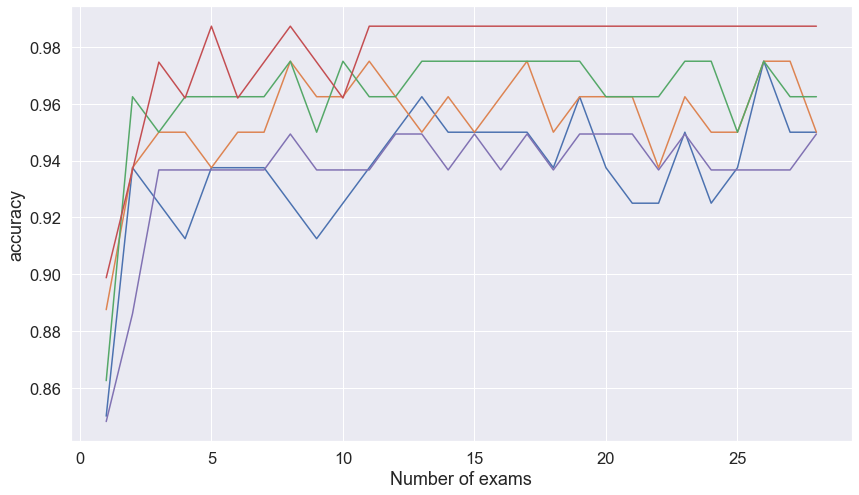

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
plt.xlabel("Number of exams")
plt.ylabel("accuracy")
plt.plot(range(1, len(select_rfecv.grid_scores_) +1), select_rfecv.grid_scores_)
plt.show()

In [77]:
# Selecionar com duas features:

select_rfe = RFE(estimator = classifier, n_features_to_select = 2, step = 1)
select_rfe.fit(training_x, training_y)

dataExams_v7 = select_rfe.transform(dataExams_v6)

In [78]:
dataExams_v7.shape

(569, 2)

### 12.4 Gráfico 2

<AxesSubplot: >

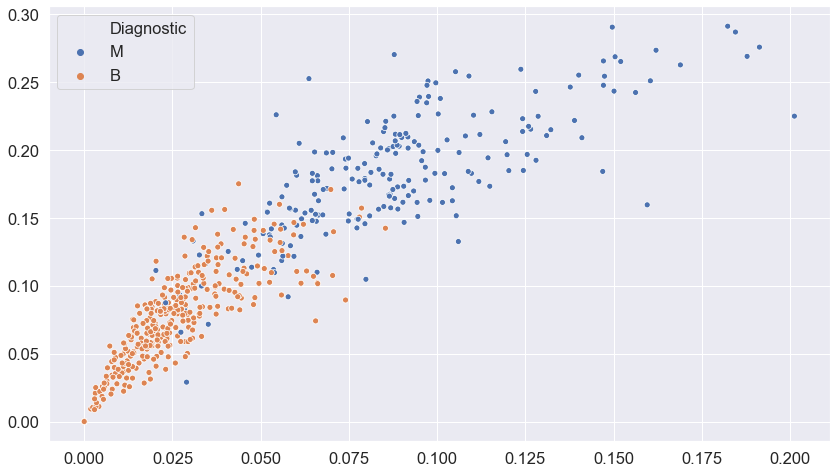

In [80]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.scatterplot(x = dataExams_v7[:,0] , y = dataExams_v7[:,1], hue = diagnostic)

## 13. Principal Component Analysis (PCA)    
Redução de dados sem perder informações  
Link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

<AxesSubplot: >

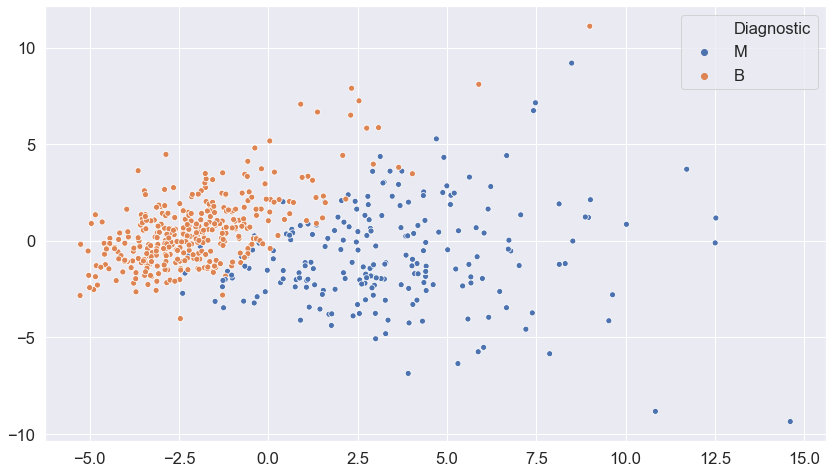

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
dataExams_v8 = pca.fit_transform(dataExams_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = dataExams_v8[:,0] , y = dataExams_v8[:,1], hue = diagnostic)

## 14. t-SNE    
T-distributed Stochastic Neighbor Embedding.  
Link: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

<AxesSubplot: >

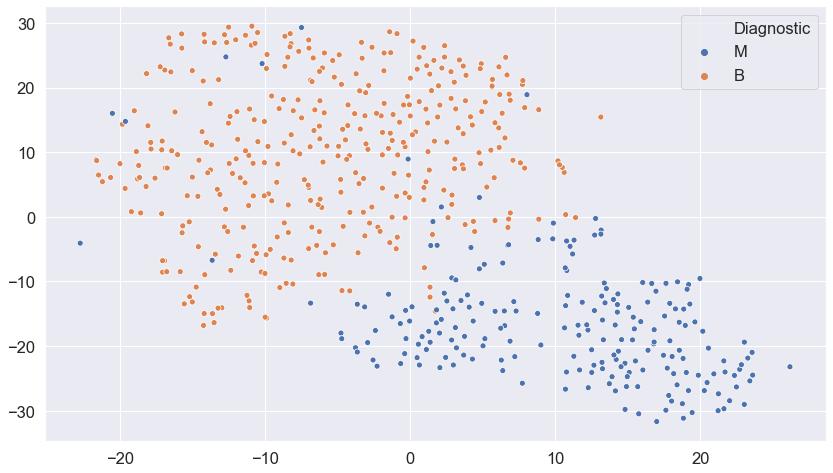

In [82]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
dataExams_v9 = tsne.fit_transform(dataExams_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = dataExams_v9[:,0] , y = dataExams_v9[:,1], hue = diagnostic)